# Stock price prediction using Machine learning

In [175]:
# import pip
# pip.main(["install", "yfinance"])

In [176]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

### Data

In [177]:
df = yf.download("AAPL", start = "2010-01-01", end = "2019-12-31")

[*********************100%%**********************]  1 of 1 completed


In [178]:
df["Close"].max()

72.87999725341797

In [179]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [180]:
# df = df["Close"] # Choose close column
# df.head()

In [183]:
df = df["Close"].to_frame()
df.head()

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


Shift, Sliding window

In [184]:
# import pandas as pd
# df = pd.DataFrame({"Close": [2,4,5,6,4,3,5,6,1,5,3]})
# print(df, "\n")

# print("Shifted\n")
# df_shift = df["Close"].shift(-1)   # 1, 2, shift to two times back last one remove(0), -1 up by one first one remove
# print( df_shift)

### Sliding Window

In [186]:
df["Close in 10 changes"]  = df["Close"].shift(-10) # Here the window is 10 changes

In [187]:
df.tail(20)

,Close,Close in 10 changes
Date,,
2019-12-02,66.040001,69.964996
2019-12-03,64.862503,70.102501
2019-12-04,65.434998,69.934998
2019-12-05,66.394997,70.004997
2019-12-06,67.677498,69.860001
2019-12-09,66.730003,71.000000
2019-12-10,67.120003,71.067497
2019-12-11,67.692497,72.477501
2019-12-12,67.864998,72.449997


In [188]:
dfc = df.iloc[:-10, :]   # Ignoring last 10 items (:-10)
dfc.head()

,Close,Close in 10 changes
Date,,
2010-01-04,7.643214,7.680000
2010-01-05,7.656429,7.561786
2010-01-06,7.534643,7.431071
2010-01-07,7.520714,7.062500
2010-01-08,7.570714,7.252500


In [189]:
dfc.tail()

,Close,Close in 10 changes
Date,,
2019-12-09,66.730003,71.000000
2019-12-10,67.120003,71.067497
2019-12-11,67.692497,72.477501
2019-12-12,67.864998,72.449997
2019-12-13,68.787498,72.879997


In [190]:
df.reset_index(inplace = True)

In [191]:
df.head()

,Date,Close,Close in 10 changes
0,2010-01-04,7.643214,7.680000
1,2010-01-05,7.656429,7.561786
2,2010-01-06,7.534643,7.431071
3,2010-01-07,7.520714,7.062500
4,2010-01-08,7.570714,7.252500


In [192]:
df.tail()

,Date,Close,Close in 10 changes
2510,2019-12-23,71.000000,NaN
2511,2019-12-24,71.067497,NaN
2512,2019-12-26,72.477501,NaN
2513,2019-12-27,72.449997,NaN
2514,2019-12-30,72.879997,NaN


### Machine Learning

In [193]:
print(dfc.shape)
print(dfc.shape[0])

(2505, 2)
2505


In [198]:
x = dfc.iloc[:, 0].values.reshape(data_frame_c.shape[0], 1)
y = dfc.iloc[:, 1].values

In [199]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [203]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.7959333490739895

### Forcasting

In [219]:
y_actual_10 = dfc.iloc[-10: , :]["Close in 10 changes"].values
y_actual_10

array([69.96499634, 70.10250092, 69.93499756, 70.00499725, 69.86000061,
       71.        , 71.06749725, 72.47750092, 72.44999695, 72.87999725])

In [220]:
y_pred_10 = rf.predict(dfc.iloc[-10 : , : ]["Close"].values.reshape(10, 1))

In [221]:
y_pred_10

array([67.37299274, 68.36619621, 66.67368231, 67.34706883, 70.66294525,
       69.20273546, 69.67517305, 71.72041537, 72.13903322, 72.6080526 ])

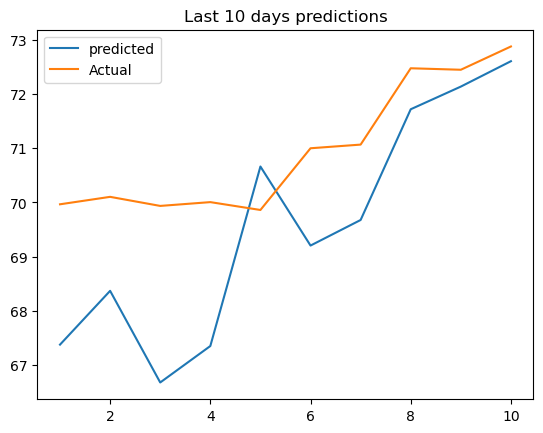

In [222]:
plt.plot(range(1, 11), y_pred_10)
plt.plot(range(1, 11), y_actual_10)
plt.legend(["predicted", "Actual"])
plt.title("Last 10 days predictions")
plt.show()